# Clustering, k-means
Cluster the data sets train_smpl, **`train_smpl_<label>`** (apply required filters and/or attribute selections if needed), using the k-means algorithm:
* First try to work in a classical clustering scenario and assume that classes are not given. Research methods which allow you to visualise and analyse clusters (and the performance of the clustering algorithm on your data set).
* Note the accuracy of k-means relative to the given clusters.

In [1]:
from Scripts import helperfn as hf
from Scripts import downsample as ds
from Scripts import plotScripts as ps
from Scripts import pixelFinder as pf
from Scripts import clustering as cl
%load_ext autoreload
%autoreload 2

from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from collections import Counter, defaultdict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Load data

In [2]:
X = hf.get_data_noresults()
label_set = -1
Y = hf.get_results(label_set)
#X_data, Y = hf.balance_by_class(X, Y, size=None, allow_imbalance=False)
#X_data = hf.to_ewb(X)


## Use Principle Component Analysis to aid plotting on a scatter graph

In [3]:
pca = PCA(2)
x_pca = pca.fit_transform(X)


## Compute KMeans using EM algorithm

In [4]:
pca_kmeans = KMeans(n_clusters=10, n_init=300, max_iter=1000, random_state=21, algorithm='full').fit_predict(x_pca)

In [5]:
YY = Y.reset_index(drop=True)

#### View how many of each class are assigned to a given cluster

In [6]:
cluster = cl.cluster_num_elements_to_dict(pca_kmeans, YY, verbose=True)

cluster- 0 classes:-  Counter({4: 660, 3: 446, 2: 184, 6: 153, 1: 90, 8: 82, 5: 30, 7: 21, 9: 2})
cluster- 1 classes:-  Counter({1: 462, 2: 146, 8: 106, 0: 96, 4: 62, 3: 36, 5: 22, 9: 17, 7: 13, 6: 5})
cluster- 2 classes:-  Counter({2: 460, 1: 326, 4: 309, 7: 113, 8: 53, 3: 48, 5: 34, 9: 14, 0: 12, 6: 4})
cluster- 3 classes:-  Counter({3: 152, 1: 91, 2: 51, 9: 33, 8: 32, 6: 25, 0: 9, 4: 7, 5: 1})
cluster- 4 classes:-  Counter({2: 298, 1: 226, 4: 184, 5: 25, 8: 25, 0: 21, 7: 2})
cluster- 5 classes:-  Counter({1: 189, 8: 82, 2: 54, 4: 51, 0: 24, 9: 12, 3: 9, 5: 4})
cluster- 6 classes:-  Counter({3: 203, 2: 124, 4: 64, 1: 56, 6: 34, 7: 15, 9: 12, 0: 10, 8: 3})
cluster- 7 classes:-  Counter({2: 209, 1: 165, 4: 131, 0: 2})
cluster- 8 classes:-  Counter({1: 267, 2: 204, 4: 174, 3: 127, 9: 52, 7: 39, 0: 34, 6: 27, 8: 19, 5: 12})
cluster- 9 classes:-  Counter({2: 520, 3: 389, 1: 348, 4: 338, 8: 138, 9: 128, 6: 112, 5: 82, 7: 37, 0: 2})


In [7]:
pca_with_labels = hf.append_result_col(pd.DataFrame(x_pca), YY)

## Plot the clusters & the true labels for a visual comparison of the clusters effectiveness

#### Observation
- This has poorly seperated the classes, it is likely other preproccessing techniques or alternative parameters will be required.
- As seen in the 'Class true labels' figure the classes are not divided locally in the x and y axis
- We can clearly see that this is the cause of the failure of the algorithm to perform effective clustering

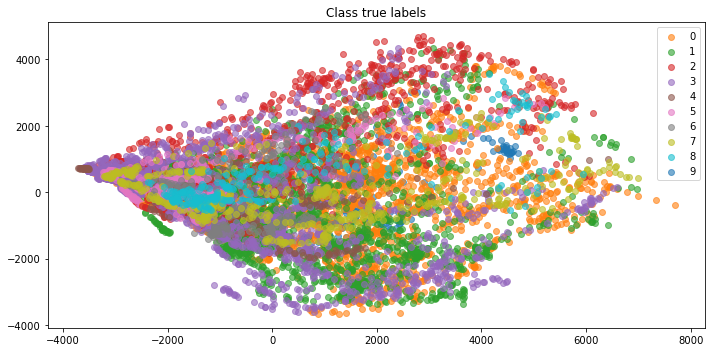

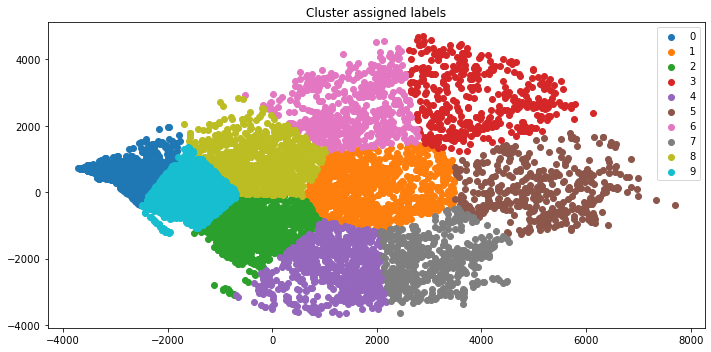

In [8]:
ps.scatter_clusters_by_class(pca_kmeans, pca_with_labels)
ps.scatter_clusters(pca_kmeans, pca_with_labels, YY)

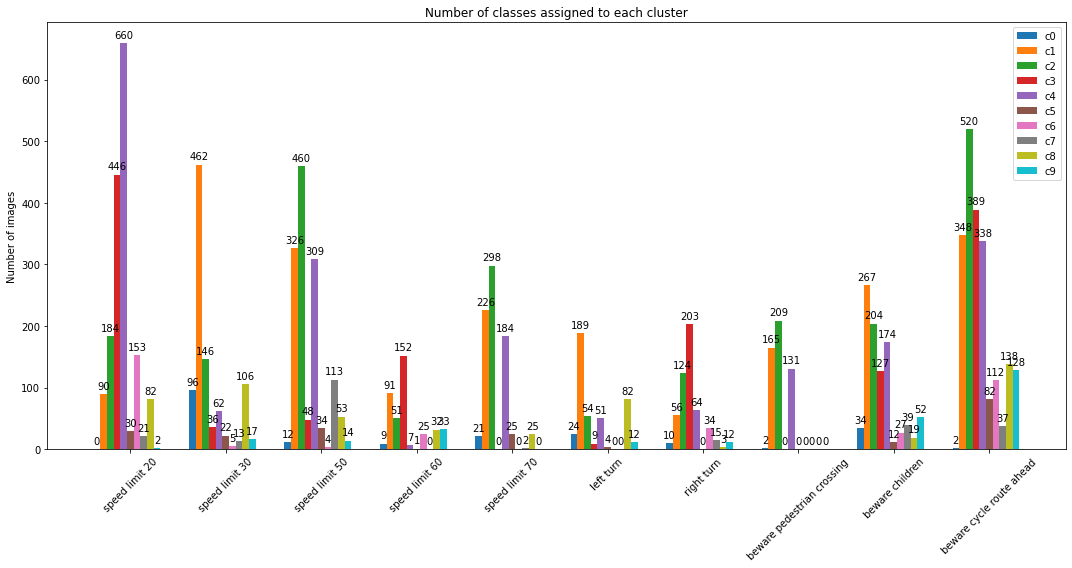

In [10]:
arr = cl.prepare_cluster_to_plot(cluster, YY)
ps.plot_scores(arr, ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"], title="Number of classes assigned to each cluster", labels=ps.g_labels[1:], bar_width=0.07, figure_size=(15, 8), y_label='Number of images')

### Modifying the Principle Component Analysis parameter
#### No real improvement is observed

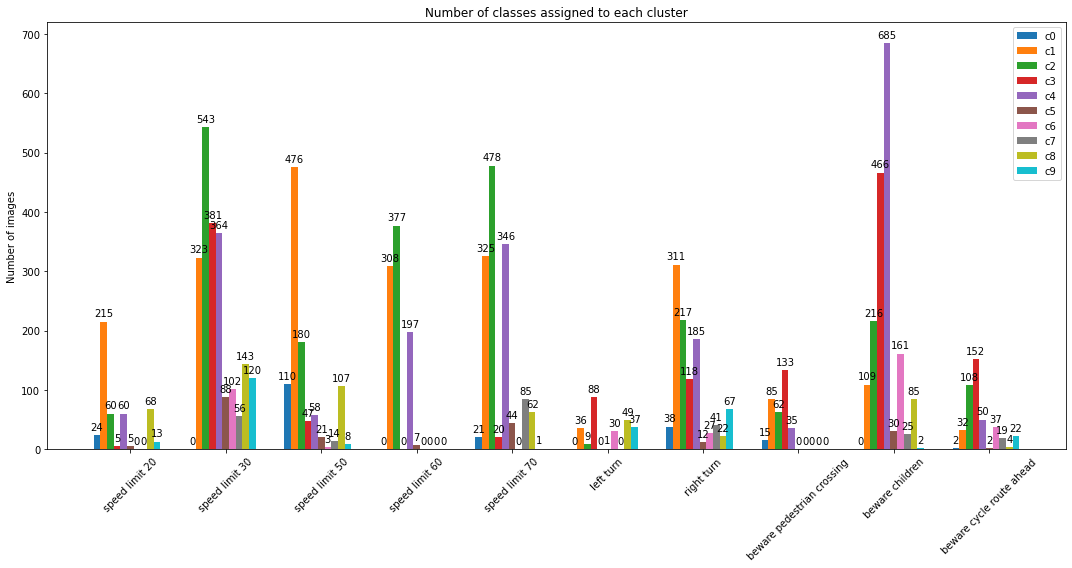

In [12]:
pca200 = PCA(200)
x_pca200 = pca200.fit_transform(X)
pca_kmeans = KMeans(n_clusters=10, n_init=300, max_iter=1000, random_state=21, algorithm='full').fit_predict(x_pca200)
cluster = cl.cluster_num_elements_to_dict(pca_kmeans, YY, verbose=False)
pca_with_labels = hf.append_result_col(pd.DataFrame(x_pca), YY)
arr = cl.prepare_cluster_to_plot(cluster, YY)
ps.plot_scores(arr, ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"], title="Number of classes assigned to each cluster", labels=ps.g_labels[1:], bar_width=0.07, figure_size=(15, 8), y_label='Number of images')

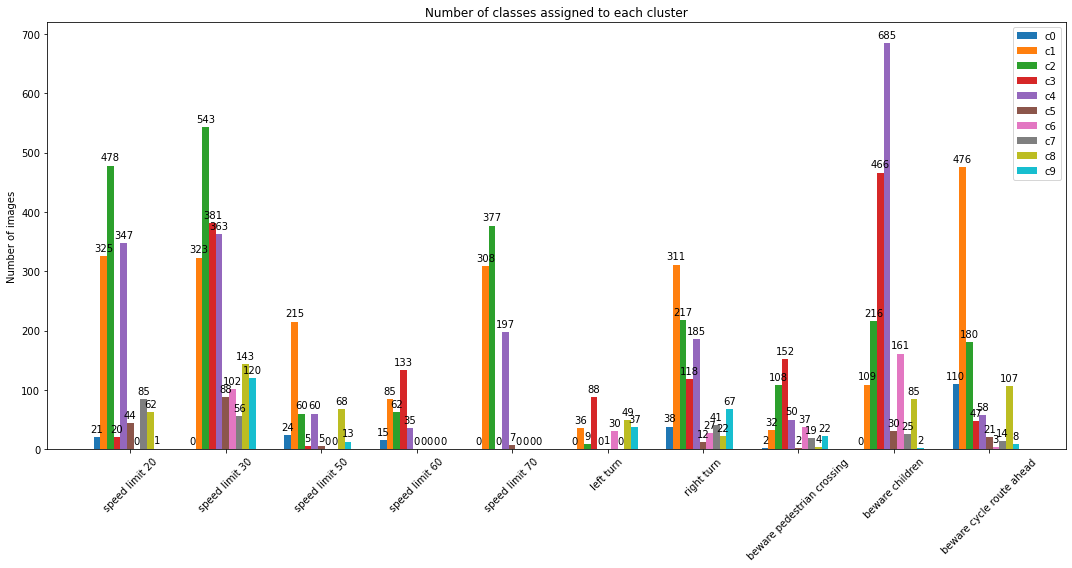

In [13]:
pca500 = PCA(500)
x_pca500 = pca500.fit_transform(X)
pca_kmeans = KMeans(n_clusters=10, n_init=300, max_iter=1000, random_state=21, algorithm='full').fit_predict(x_pca500)
cluster = cl.cluster_num_elements_to_dict(pca_kmeans, YY, verbose=False)
pca_with_labels = hf.append_result_col(pd.DataFrame(x_pca), YY)
arr = cl.prepare_cluster_to_plot(cluster, YY)
ps.plot_scores(arr, ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"], title="Number of classes assigned to each cluster", labels=ps.g_labels[1:], bar_width=0.07, figure_size=(15, 8), y_label='Number of images')

In [2]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(48, 48, 1),
    include_top=False)

ModuleNotFoundError: No module named 'tensorflow'

In [54]:
kmeans = KMeans(n_clusters=2, max_iter=800, random_state=193).fit(X)

cluster = {}

for i in range(2):
    indecies = ClusterIndicesNumpy(i, kmeans.labels_)
    inCluster = Y.to_numpy()[indecies].flatten()
    
    cluster[i] = Counter(inCluster)
    print("cluster-", i, "classes:- ", Counter(inCluster))

cluster- 0 classes:-  Counter({8: 134, 7: 112, 1: 98, 0: 93, 5: 90, 2: 89, 4: 76, 9: 74, 6: 34, 3: 16})
cluster- 1 classes:-  Counter({3: 194, 6: 176, 9: 136, 4: 134, 2: 121, 5: 120, 0: 117, 1: 112, 7: 98, 8: 76})


In [55]:
# index 0 - circle, index 1 - rectangle
sign = np.zeros((2, 2))

for i in range(len(cluster)):
    for key, value in cluster[i].items():
        if key < 5:
            sign[i][0] += value 

    sign[i][1] = sum(cluster[0].values()) - sign[i][0]

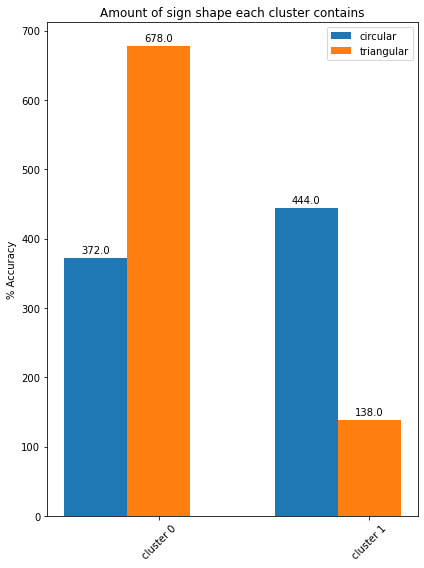

In [56]:
ps.plot_scores(sign, ["circular", "triangular"], title="Amount of sign shape each cluster contains", labels=["cluster 0", "cluster 1"], bar_width=0.3, figure_size=(6, 8))